# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 26988 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (    1 of 26988) |            | Elapsed Time: 0:00:05 ETA:  1 day, 18:31:36

  0% (   51 of 26988) |                    | Elapsed Time: 0:00:06 ETA:  0:08:54

  0% (  123 of 26988) |                    | Elapsed Time: 0:00:07 ETA:  0:07:15

  0% (  219 of 26988) |                    | Elapsed Time: 0:00:08 ETA:  0:06:03

  0% (  229 of 26988) |                    | Elapsed Time: 0:00:09 ETA:  0:08:08

  1% (  310 of 26988) |                    | Elapsed Time: 0:00:10 ETA:  0:07:24

  1% (  338 of 26988) |                    | Elapsed Time: 0:00:11 ETA:  0:07:10

  1% (  360 of 26988) |                    | Elapsed Time: 0:00:13 ETA:  0:10:10

  1% (  382 of 26988) |                    | Elapsed Time: 0:00:15 ETA:  0:10:50

  1% (  418 of 26988) |                    | Elapsed Time: 0:00:16 ETA:  0:11:08

  1% (  489 of 26988) |                    | Elapsed Time: 0:00:17 ETA:  0:10:35

  2% (  540 of 26988) |                    | Elapsed Time: 0:00:18 ETA:  0:11:23

  2% (  589 of 26988) |                    | Elapsed Time: 0:00:19 ETA:  0:12:51

  2% (  653 of 26988) |                    | Elapsed Time: 0:00:20 ETA:  0:10:57

  2% (  675 of 26988) |                    | Elapsed Time: 0:00:21 ETA:  0:12:09

  2% (  739 of 26988) |                    | Elapsed Time: 0:00:22 ETA:  0:11:48

  3% (  830 of 26988) |                    | Elapsed Time: 0:00:23 ETA:  0:08:17

  3% (  910 of 26988) |                    | Elapsed Time: 0:00:24 ETA:  0:07:16

  3% (  995 of 26988) |                    | Elapsed Time: 0:00:25 ETA:  0:06:40

  3% ( 1013 of 26988) |                    | Elapsed Time: 0:00:25 ETA:  0:07:02

  4% ( 1101 of 26988) |                    | Elapsed Time: 0:00:26 ETA:  0:06:19

  4% ( 1188 of 26988) |                    | Elapsed Time: 0:00:28 ETA:  0:05:57

  4% ( 1302 of 26988) |                    | Elapsed Time: 0:00:29 ETA:  0:05:26

  5% ( 1350 of 26988) |#                   | Elapsed Time: 0:00:29 ETA:  0:05:08

  5% ( 1459 of 26988) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:46

  5% ( 1573 of 26988) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:36

  6% ( 1687 of 26988) |#                   | Elapsed Time: 0:00:32 ETA:  0:04:09

  6% ( 1779 of 26988) |#                   | Elapsed Time: 0:00:33 ETA:  0:03:55

  6% ( 1872 of 26988) |#                   | Elapsed Time: 0:00:34 ETA:  0:03:53

  7% ( 1967 of 26988) |#                   | Elapsed Time: 0:00:35 ETA:  0:03:46

  7% ( 2025 of 26988) |#                   | Elapsed Time: 0:00:36 ETA:  0:03:50

  7% ( 2124 of 26988) |#                   | Elapsed Time: 0:00:37 ETA:  0:03:52

  8% ( 2217 of 26988) |#                   | Elapsed Time: 0:00:38 ETA:  0:03:57

  8% ( 2319 of 26988) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:59

  8% ( 2362 of 26988) |#                   | Elapsed Time: 0:00:39 ETA:  0:04:05

  9% ( 2449 of 26988) |#                   | Elapsed Time: 0:00:40 ETA:  0:04:07

  9% ( 2558 of 26988) |#                   | Elapsed Time: 0:00:41 ETA:  0:04:00

  9% ( 2658 of 26988) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:56

 10% ( 2699 of 26988) |##                  | Elapsed Time: 0:00:43 ETA:  0:04:05

 10% ( 2780 of 26988) |##                  | Elapsed Time: 0:00:44 ETA:  0:04:12

 10% ( 2880 of 26988) |##                  | Elapsed Time: 0:00:45 ETA:  0:04:10

 11% ( 2985 of 26988) |##                  | Elapsed Time: 0:00:46 ETA:  0:04:05

 11% ( 3037 of 26988) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:05

 11% ( 3102 of 26988) |##                  | Elapsed Time: 0:00:48 ETA:  0:04:14

 11% ( 3163 of 26988) |##                  | Elapsed Time: 0:00:49 ETA:  0:04:24

 12% ( 3277 of 26988) |##                  | Elapsed Time: 0:00:50 ETA:  0:04:21

 12% ( 3343 of 26988) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:35

 12% ( 3374 of 26988) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:22

 12% ( 3462 of 26988) |##                  | Elapsed Time: 0:00:52 ETA:  0:04:16

 13% ( 3532 of 26988) |##                  | Elapsed Time: 0:00:53 ETA:  0:04:31

 13% ( 3633 of 26988) |##                  | Elapsed Time: 0:00:54 ETA:  0:04:31

 13% ( 3711 of 26988) |##                  | Elapsed Time: 0:00:55 ETA:  0:04:25

 13% ( 3764 of 26988) |##                  | Elapsed Time: 0:00:56 ETA:  0:04:32

 14% ( 3829 of 26988) |##                  | Elapsed Time: 0:00:57 ETA:  0:04:30

 14% ( 3926 of 26988) |##                  | Elapsed Time: 0:00:58 ETA:  0:04:38

 15% ( 4049 of 26988) |###                 | Elapsed Time: 0:00:59 ETA:  0:04:18

 15% ( 4142 of 26988) |###                 | Elapsed Time: 0:01:00 ETA:  0:04:15

 15% ( 4247 of 26988) |###                 | Elapsed Time: 0:01:01 ETA:  0:03:57

 16% ( 4331 of 26988) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:04

 16% ( 4386 of 26988) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:14

 16% ( 4464 of 26988) |###                 | Elapsed Time: 0:01:03 ETA:  0:03:59

 16% ( 4569 of 26988) |###                 | Elapsed Time: 0:01:04 ETA:  0:03:40

 17% ( 4667 of 26988) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:39

 17% ( 4723 of 26988) |###                 | Elapsed Time: 0:01:06 ETA:  0:03:47

 17% ( 4796 of 26988) |###                 | Elapsed Time: 0:01:07 ETA:  0:03:52

 18% ( 4897 of 26988) |###                 | Elapsed Time: 0:01:08 ETA:  0:03:48

 18% ( 5000 of 26988) |###                 | Elapsed Time: 0:01:09 ETA:  0:03:48

 18% ( 5061 of 26988) |###                 | Elapsed Time: 0:01:10 ETA:  0:03:42

 19% ( 5133 of 26988) |###                 | Elapsed Time: 0:01:11 ETA:  0:03:46

 19% ( 5247 of 26988) |###                 | Elapsed Time: 0:01:12 ETA:  0:03:32

 19% ( 5325 of 26988) |###                 | Elapsed Time: 0:01:13 ETA:  0:03:41

 20% ( 5398 of 26988) |####                | Elapsed Time: 0:01:14 ETA:  0:03:48

 20% ( 5476 of 26988) |####                | Elapsed Time: 0:01:15 ETA:  0:03:54

 20% ( 5559 of 26988) |####                | Elapsed Time: 0:01:16 ETA:  0:03:49

 20% ( 5617 of 26988) |####                | Elapsed Time: 0:01:17 ETA:  0:04:06

 21% ( 5684 of 26988) |####                | Elapsed Time: 0:01:18 ETA:  0:04:23

 21% ( 5735 of 26988) |####                | Elapsed Time: 0:01:18 ETA:  0:04:29

 21% ( 5828 of 26988) |####                | Elapsed Time: 0:01:19 ETA:  0:04:17

 21% ( 5924 of 26988) |####                | Elapsed Time: 0:01:20 ETA:  0:04:25

 22% ( 6041 of 26988) |####                | Elapsed Time: 0:01:21 ETA:  0:04:05

 22% ( 6073 of 26988) |####                | Elapsed Time: 0:01:22 ETA:  0:03:57

 22% ( 6191 of 26988) |####                | Elapsed Time: 0:01:23 ETA:  0:03:37

 23% ( 6292 of 26988) |####                | Elapsed Time: 0:01:24 ETA:  0:03:29

 23% ( 6410 of 26988) |####                | Elapsed Time: 0:01:25 ETA:  0:02:58

 24% ( 6492 of 26988) |####                | Elapsed Time: 0:01:26 ETA:  0:03:00

 24% ( 6569 of 26988) |####                | Elapsed Time: 0:01:27 ETA:  0:03:04

 24% ( 6675 of 26988) |####                | Elapsed Time: 0:01:28 ETA:  0:03:00

 25% ( 6748 of 26988) |#####               | Elapsed Time: 0:01:29 ETA:  0:03:06

 25% ( 6866 of 26988) |#####               | Elapsed Time: 0:01:30 ETA:  0:03:00

 25% ( 6981 of 26988) |#####               | Elapsed Time: 0:01:31 ETA:  0:03:00

 26% ( 7047 of 26988) |#####               | Elapsed Time: 0:01:32 ETA:  0:03:11

 26% ( 7085 of 26988) |#####               | Elapsed Time: 0:01:32 ETA:  0:03:14

 26% ( 7196 of 26988) |#####               | Elapsed Time: 0:01:33 ETA:  0:03:08

 26% ( 7279 of 26988) |#####               | Elapsed Time: 0:01:34 ETA:  0:03:06

 27% ( 7379 of 26988) |#####               | Elapsed Time: 0:01:35 ETA:  0:02:57

 27% ( 7422 of 26988) |#####               | Elapsed Time: 0:01:36 ETA:  0:03:03

 27% ( 7516 of 26988) |#####               | Elapsed Time: 0:01:37 ETA:  0:03:03

 28% ( 7586 of 26988) |#####               | Elapsed Time: 0:01:38 ETA:  0:03:21

 28% ( 7684 of 26988) |#####               | Elapsed Time: 0:01:39 ETA:  0:03:27

 28% ( 7760 of 26988) |#####               | Elapsed Time: 0:01:39 ETA:  0:03:12

 29% ( 7848 of 26988) |#####               | Elapsed Time: 0:01:40 ETA:  0:03:12

 29% ( 7951 of 26988) |#####               | Elapsed Time: 0:01:41 ETA:  0:03:14

 29% ( 8056 of 26988) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:06

 30% ( 8097 of 26988) |######              | Elapsed Time: 0:01:43 ETA:  0:03:07

 30% ( 8179 of 26988) |######              | Elapsed Time: 0:01:44 ETA:  0:03:08

 30% ( 8241 of 26988) |######              | Elapsed Time: 0:01:45 ETA:  0:03:24

 30% ( 8349 of 26988) |######              | Elapsed Time: 0:01:46 ETA:  0:03:07

 31% ( 8434 of 26988) |######              | Elapsed Time: 0:01:47 ETA:  0:03:02

 31% ( 8485 of 26988) |######              | Elapsed Time: 0:01:48 ETA:  0:03:21

 31% ( 8597 of 26988) |######              | Elapsed Time: 0:01:49 ETA:  0:03:10

 32% ( 8712 of 26988) |######              | Elapsed Time: 0:01:50 ETA:  0:03:04

 32% ( 8772 of 26988) |######              | Elapsed Time: 0:01:50 ETA:  0:03:03

 32% ( 8881 of 26988) |######              | Elapsed Time: 0:01:51 ETA:  0:02:57

 33% ( 9004 of 26988) |######              | Elapsed Time: 0:01:52 ETA:  0:02:41

 33% ( 9109 of 26988) |######              | Elapsed Time: 0:01:53 ETA:  0:02:23

 34% ( 9216 of 26988) |######              | Elapsed Time: 0:01:54 ETA:  0:02:22

 34% ( 9345 of 26988) |######              | Elapsed Time: 0:01:55 ETA:  0:02:17

 35% ( 9446 of 26988) |#######             | Elapsed Time: 0:01:56 ETA:  0:01:57

 35% ( 9555 of 26988) |#######             | Elapsed Time: 0:01:57 ETA:  0:01:57

 35% ( 9660 of 26988) |#######             | Elapsed Time: 0:01:58 ETA:  0:01:59

 36% ( 9784 of 26988) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:54

 36% ( 9879 of 26988) |#######             | Elapsed Time: 0:02:00 ETA:  0:02:01

 37% ( 9988 of 26988) |#######             | Elapsed Time: 0:02:01 ETA:  0:02:00

 37% (10121 of 26988) |#######             | Elapsed Time: 0:02:02 ETA:  0:02:02

 37% (10238 of 26988) |#######             | Elapsed Time: 0:02:03 ETA:  0:02:03

 38% (10356 of 26988) |#######             | Elapsed Time: 0:02:04 ETA:  0:01:59

 38% (10458 of 26988) |#######             | Elapsed Time: 0:02:05 ETA:  0:01:58

 39% (10569 of 26988) |#######             | Elapsed Time: 0:02:06 ETA:  0:02:01

 39% (10687 of 26988) |#######             | Elapsed Time: 0:02:07 ETA:  0:01:57

 40% (10796 of 26988) |########            | Elapsed Time: 0:02:08 ETA:  0:01:51

 40% (10912 of 26988) |########            | Elapsed Time: 0:02:09 ETA:  0:01:48

 40% (11001 of 26988) |########            | Elapsed Time: 0:02:10 ETA:  0:01:53

 41% (11107 of 26988) |########            | Elapsed Time: 0:02:11 ETA:  0:01:53

 41% (11133 of 26988) |########            | Elapsed Time: 0:02:11 ETA:  0:01:55

 41% (11244 of 26988) |########            | Elapsed Time: 0:02:12 ETA:  0:01:56

 42% (11359 of 26988) |########            | Elapsed Time: 0:02:13 ETA:  0:01:52

 42% (11470 of 26988) |########            | Elapsed Time: 0:02:15 ETA:  0:01:54

 42% (11580 of 26988) |########            | Elapsed Time: 0:02:16 ETA:  0:01:54

 43% (11684 of 26988) |########            | Elapsed Time: 0:02:17 ETA:  0:01:57

 43% (11808 of 26988) |########            | Elapsed Time: 0:02:18 ETA:  0:01:50

 44% (11925 of 26988) |########            | Elapsed Time: 0:02:19 ETA:  0:01:47

 44% (12043 of 26988) |########            | Elapsed Time: 0:02:20 ETA:  0:01:44

 45% (12145 of 26988) |#########           | Elapsed Time: 0:02:21 ETA:  0:01:43

 45% (12240 of 26988) |#########           | Elapsed Time: 0:02:22 ETA:  0:01:47

 45% (12334 of 26988) |#########           | Elapsed Time: 0:02:23 ETA:  0:01:50

 46% (12431 of 26988) |#########           | Elapsed Time: 0:02:24 ETA:  0:02:10

 46% (12482 of 26988) |#########           | Elapsed Time: 0:02:25 ETA:  0:02:13

 46% (12578 of 26988) |#########           | Elapsed Time: 0:02:26 ETA:  0:02:15

 47% (12686 of 26988) |#########           | Elapsed Time: 0:02:27 ETA:  0:02:11

 47% (12780 of 26988) |#########           | Elapsed Time: 0:02:28 ETA:  0:02:17

 47% (12820 of 26988) |#########           | Elapsed Time: 0:02:28 ETA:  0:02:24

 47% (12930 of 26988) |#########           | Elapsed Time: 0:02:29 ETA:  0:02:24

 48% (13040 of 26988) |#########           | Elapsed Time: 0:02:30 ETA:  0:02:17

 48% (13157 of 26988) |#########           | Elapsed Time: 0:02:31 ETA:  0:01:50

 49% (13263 of 26988) |#########           | Elapsed Time: 0:02:32 ETA:  0:01:46

 49% (13375 of 26988) |#########           | Elapsed Time: 0:02:33 ETA:  0:01:40

 50% (13495 of 26988) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:34

 50% (13599 of 26988) |##########          | Elapsed Time: 0:02:35 ETA:  0:01:35

 50% (13720 of 26988) |##########          | Elapsed Time: 0:02:36 ETA:  0:01:30

 51% (13832 of 26988) |##########          | Elapsed Time: 0:02:37 ETA:  0:01:24

 51% (13943 of 26988) |##########          | Elapsed Time: 0:02:38 ETA:  0:01:22

 52% (14061 of 26988) |##########          | Elapsed Time: 0:02:39 ETA:  0:01:20

 52% (14169 of 26988) |##########          | Elapsed Time: 0:02:40 ETA:  0:01:19

 52% (14279 of 26988) |##########          | Elapsed Time: 0:02:41 ETA:  0:01:16

 53% (14392 of 26988) |##########          | Elapsed Time: 0:02:42 ETA:  0:01:16

 53% (14507 of 26988) |##########          | Elapsed Time: 0:02:43 ETA:  0:01:15

 54% (14628 of 26988) |##########          | Elapsed Time: 0:02:44 ETA:  0:01:15

 54% (14743 of 26988) |##########          | Elapsed Time: 0:02:45 ETA:  0:01:13

 55% (14844 of 26988) |###########         | Elapsed Time: 0:02:46 ETA:  0:01:14

 55% (14962 of 26988) |###########         | Elapsed Time: 0:02:47 ETA:  0:01:09

 55% (15076 of 26988) |###########         | Elapsed Time: 0:02:48 ETA:  0:01:08

 56% (15181 of 26988) |###########         | Elapsed Time: 0:02:49 ETA:  0:01:08

 56% (15301 of 26988) |###########         | Elapsed Time: 0:02:50 ETA:  0:01:05

 57% (15406 of 26988) |###########         | Elapsed Time: 0:02:51 ETA:  0:01:07

 57% (15519 of 26988) |###########         | Elapsed Time: 0:02:52 ETA:  0:01:08

 57% (15631 of 26988) |###########         | Elapsed Time: 0:02:53 ETA:  0:01:08

 58% (15741 of 26988) |###########         | Elapsed Time: 0:02:54 ETA:  0:01:07

 58% (15833 of 26988) |###########         | Elapsed Time: 0:02:55 ETA:  0:01:13

 58% (15856 of 26988) |###########         | Elapsed Time: 0:02:56 ETA:  0:01:15

 59% (15965 of 26988) |###########         | Elapsed Time: 0:02:57 ETA:  0:01:12

 59% (16076 of 26988) |###########         | Elapsed Time: 0:02:58 ETA:  0:01:10

 60% (16193 of 26988) |############        | Elapsed Time: 0:02:59 ETA:  0:01:10

 60% (16296 of 26988) |############        | Elapsed Time: 0:03:00 ETA:  0:01:12

 60% (16395 of 26988) |############        | Elapsed Time: 0:03:01 ETA:  0:01:15

 61% (16501 of 26988) |############        | Elapsed Time: 0:03:02 ETA:  0:01:15

 61% (16531 of 26988) |############        | Elapsed Time: 0:03:02 ETA:  0:01:10

 61% (16639 of 26988) |############        | Elapsed Time: 0:03:03 ETA:  0:01:09

 62% (16750 of 26988) |############        | Elapsed Time: 0:03:04 ETA:  0:01:08

 62% (16868 of 26988) |############        | Elapsed Time: 0:03:05 ETA:  0:01:12

 62% (16972 of 26988) |############        | Elapsed Time: 0:03:06 ETA:  0:01:12

 63% (17090 of 26988) |############        | Elapsed Time: 0:03:07 ETA:  0:01:06

 63% (17152 of 26988) |############        | Elapsed Time: 0:03:08 ETA:  0:01:30

 63% (17205 of 26988) |############        | Elapsed Time: 0:03:09 ETA:  0:01:32

 64% (17305 of 26988) |############        | Elapsed Time: 0:03:10 ETA:  0:01:31

 64% (17412 of 26988) |############        | Elapsed Time: 0:03:11 ETA:  0:01:30

 64% (17481 of 26988) |############        | Elapsed Time: 0:03:12 ETA:  0:01:45

 65% (17543 of 26988) |#############       | Elapsed Time: 0:03:13 ETA:  0:01:48

 65% (17647 of 26988) |#############       | Elapsed Time: 0:03:14 ETA:  0:01:41

 65% (17763 of 26988) |#############       | Elapsed Time: 0:03:15 ETA:  0:01:35

 66% (17880 of 26988) |#############       | Elapsed Time: 0:03:16 ETA:  0:01:12

 66% (17996 of 26988) |#############       | Elapsed Time: 0:03:17 ETA:  0:01:06

 67% (18111 of 26988) |#############       | Elapsed Time: 0:03:18 ETA:  0:01:00

 67% (18217 of 26988) |#############       | Elapsed Time: 0:03:19 ETA:  0:00:57

 67% (18334 of 26988) |#############       | Elapsed Time: 0:03:20 ETA:  0:00:41

 68% (18433 of 26988) |#############       | Elapsed Time: 0:03:21 ETA:  0:00:43

 68% (18555 of 26988) |#############       | Elapsed Time: 0:03:22 ETA:  0:00:43

 69% (18663 of 26988) |#############       | Elapsed Time: 0:03:23 ETA:  0:00:41

 69% (18778 of 26988) |#############       | Elapsed Time: 0:03:24 ETA:  0:00:39

 70% (18892 of 26988) |##############      | Elapsed Time: 0:03:25 ETA:  0:00:43

 70% (18991 of 26988) |##############      | Elapsed Time: 0:03:26 ETA:  0:00:47

 70% (19092 of 26988) |##############      | Elapsed Time: 0:03:27 ETA:  0:00:51

 71% (19207 of 26988) |##############      | Elapsed Time: 0:03:28 ETA:  0:00:45

 71% (19229 of 26988) |##############      | Elapsed Time: 0:03:28 ETA:  0:00:44

 71% (19333 of 26988) |##############      | Elapsed Time: 0:03:29 ETA:  0:00:44

 72% (19433 of 26988) |##############      | Elapsed Time: 0:03:30 ETA:  0:00:46

 72% (19533 of 26988) |##############      | Elapsed Time: 0:03:31 ETA:  0:00:50

 72% (19567 of 26988) |##############      | Elapsed Time: 0:03:31 ETA:  0:00:49

 72% (19679 of 26988) |##############      | Elapsed Time: 0:03:32 ETA:  0:00:45

 73% (19792 of 26988) |##############      | Elapsed Time: 0:03:33 ETA:  0:00:39

 73% (19904 of 26988) |##############      | Elapsed Time: 0:03:34 ETA:  0:00:35

 74% (20024 of 26988) |##############      | Elapsed Time: 0:03:35 ETA:  0:00:32

 74% (20123 of 26988) |##############      | Elapsed Time: 0:03:36 ETA:  0:00:33

 75% (20242 of 26988) |###############     | Elapsed Time: 0:03:38 ETA:  0:00:29

 75% (20350 of 26988) |###############     | Elapsed Time: 0:03:39 ETA:  0:00:26

 75% (20469 of 26988) |###############     | Elapsed Time: 0:03:40 ETA:  0:00:23

 76% (20579 of 26988) |###############     | Elapsed Time: 0:03:41 ETA:  0:00:22

 76% (20691 of 26988) |###############     | Elapsed Time: 0:03:42 ETA:  0:00:21

 77% (20805 of 26988) |###############     | Elapsed Time: 0:03:43 ETA:  0:00:20

 77% (20916 of 26988) |###############     | Elapsed Time: 0:03:44 ETA:  0:00:20

 77% (21025 of 26988) |###############     | Elapsed Time: 0:03:45 ETA:  0:00:16

 78% (21130 of 26988) |###############     | Elapsed Time: 0:03:46 ETA:  0:00:16

 78% (21254 of 26988) |###############     | Elapsed Time: 0:03:47 ETA:  0:00:15

 79% (21360 of 26988) |###############     | Elapsed Time: 0:03:48 ETA:  0:00:18

 79% (21476 of 26988) |###############     | Elapsed Time: 0:03:49 ETA:  0:00:16

 80% (21591 of 26988) |################    | Elapsed Time: 0:03:50 ETA:  0:00:17

 80% (21677 of 26988) |################    | Elapsed Time: 0:03:51 ETA:  0:00:26

 80% (21788 of 26988) |################    | Elapsed Time: 0:03:52 ETA:  0:00:25

 81% (21903 of 26988) |################    | Elapsed Time: 0:03:53 ETA:  0:00:20

 81% (21928 of 26988) |################    | Elapsed Time: 0:03:53 ETA:  0:00:21

 81% (22042 of 26988) |################    | Elapsed Time: 0:03:54 ETA:  0:00:16

 82% (22151 of 26988) |################    | Elapsed Time: 0:03:55 ETA:  0:00:14

 82% (22266 of 26988) |################    | Elapsed Time: 0:03:56 ETA:  0:00:15

 82% (22366 of 26988) |################    | Elapsed Time: 0:03:57 ETA:  0:00:16

 83% (22483 of 26988) |################    | Elapsed Time: 0:03:58 ETA:  0:00:06

 83% (22603 of 26988) |################    | Elapsed Time: 0:03:59 ETA:  0:00:06

 84% (22708 of 26988) |################    | Elapsed Time: 0:04:00 ETA:  0:00:06

 84% (22816 of 26988) |################    | Elapsed Time: 0:04:01 ETA:  0:00:07

 84% (22878 of 26988) |################    | Elapsed Time: 0:04:03 ETA:  0:00:43

 85% (22940 of 26988) |#################   | Elapsed Time: 0:04:03 ETA:  0:00:45

 85% (23044 of 26988) |#################   | Elapsed Time: 0:04:04 ETA:  0:00:41

 85% (23154 of 26988) |#################   | Elapsed Time: 0:04:05 ETA:  0:00:37

 86% (23278 of 26988) |#################   | Elapsed Time: 0:04:06 ETA:  0:00:42

 86% (23390 of 26988) |#################   | Elapsed Time: 0:04:07 ETA:  0:00:35

 87% (23491 of 26988) |#################   | Elapsed Time: 0:04:08 ETA:  0:00:35

 87% (23615 of 26988) |#################   | Elapsed Time: 0:04:10 ETA:  0:00:00

 87% (23715 of 26988) |#################   | Elapsed Time: 0:04:11 ETA:  0:00:00

 88% (23828 of 26988) |#################   | Elapsed Time: 0:04:12 ETA:  0:00:00

 88% (23917 of 26988) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:00

 88% (23952 of 26988) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:03

 89% (24053 of 26988) |#################   | Elapsed Time: 0:04:14 ETA:  0:00:04

 89% (24146 of 26988) |#################   | Elapsed Time: 0:04:15 ETA:  0:00:09

 89% (24253 of 26988) |#################   | Elapsed Time: 0:04:16 ETA:  0:00:06

 90% (24290 of 26988) |##################  | Elapsed Time: 0:04:16 ETA:  0:00:10

 90% (24386 of 26988) |##################  | Elapsed Time: 0:04:17 ETA:  0:00:11

 90% (24492 of 26988) |##################  | Elapsed Time: 0:04:18 ETA:  0:00:08

 91% (24607 of 26988) |##################  | Elapsed Time: 0:04:19 ETA:  0:00:07

 91% (24627 of 26988) |##################  | Elapsed Time: 0:04:19 ETA:  0:00:03

 91% (24711 of 26988) |##################  | Elapsed Time: 0:04:20 ETA:  0:00:10

 91% (24814 of 26988) |##################  | Elapsed Time: 0:04:21 ETA:  0:00:08

 92% (24918 of 26988) |##################  | Elapsed Time: 0:04:22 ETA:  0:00:03

 92% (24964 of 26988) |##################  | Elapsed Time: 0:04:23 ETA:  0:00:06

 92% (25070 of 26988) |##################  | Elapsed Time: 0:04:24 ETA:  0:00:04

 93% (25176 of 26988) |##################  | Elapsed Time: 0:04:25 ETA:  0:00:00

 93% (25267 of 26988) |##################  | Elapsed Time: 0:04:26 ETA:  0:00:03

 93% (25302 of 26988) |##################  | Elapsed Time: 0:04:26 ETA:  0:00:07

 94% (25409 of 26988) |##################  | Elapsed Time: 0:04:27 ETA:  0:00:03

 94% (25520 of 26988) |##################  | Elapsed Time: 0:04:28 ETA:  0:00:00

 95% (25639 of 26988) |################### | Elapsed Time: 0:04:29 ETA:  0:00:00

 95% (25734 of 26988) |################### | Elapsed Time: 0:04:30 ETA:  0:00:00

 95% (25836 of 26988) |################### | Elapsed Time: 0:04:31 ETA:  0:00:00

 96% (25942 of 26988) |################### | Elapsed Time: 0:04:32 ETA:  0:00:00

 96% (25976 of 26988) |################### | Elapsed Time: 0:04:33 ETA:  0:00:00

 96% (26072 of 26988) |################### | Elapsed Time: 0:04:34 ETA:  0:00:00

 96% (26171 of 26988) |################### | Elapsed Time: 0:04:35 ETA:  0:00:00

 97% (26280 of 26988) |################### | Elapsed Time: 0:04:36 ETA:  0:00:00

 97% (26314 of 26988) |################### | Elapsed Time: 0:04:36 ETA:  0:00:00

 97% (26415 of 26988) |################### | Elapsed Time: 0:04:37 ETA:  0:00:00

 98% (26522 of 26988) |################### | Elapsed Time: 0:04:38 ETA:  0:00:00

 98% (26622 of 26988) |################### | Elapsed Time: 0:04:39 ETA:  0:00:00

 98% (26651 of 26988) |################### | Elapsed Time: 0:04:39 ETA:  0:00:00

 99% (26751 of 26988) |################### | Elapsed Time: 0:04:40 ETA:  0:00:00

 99% (26844 of 26988) |################### | Elapsed Time: 0:04:41 ETA:  0:00:00

 99% (26927 of 26988) |################### | Elapsed Time: 0:04:42 ETA:  0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:04:43 Time: 0:04:43


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

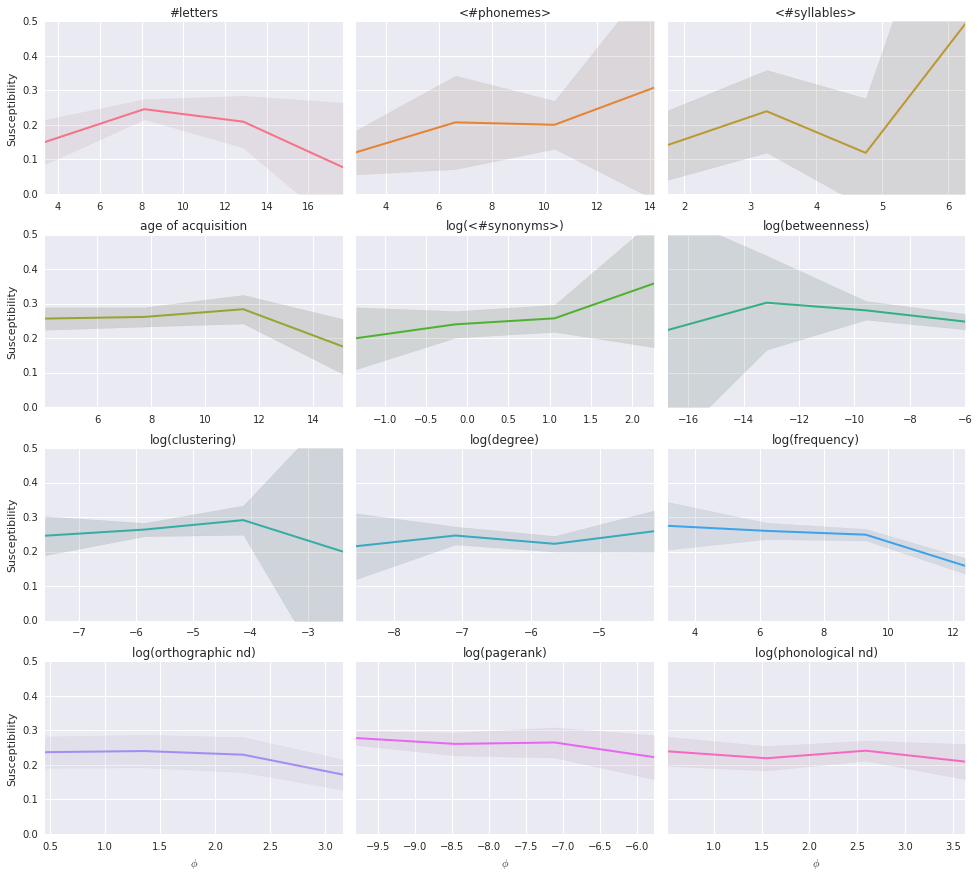

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

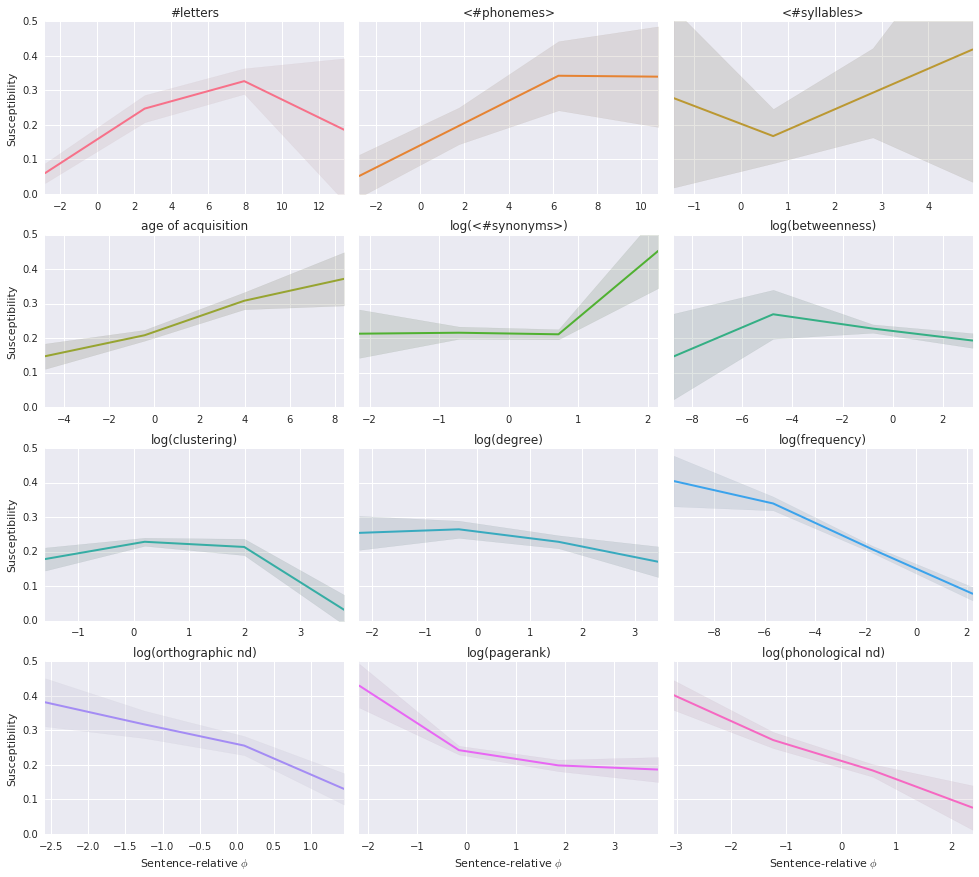

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

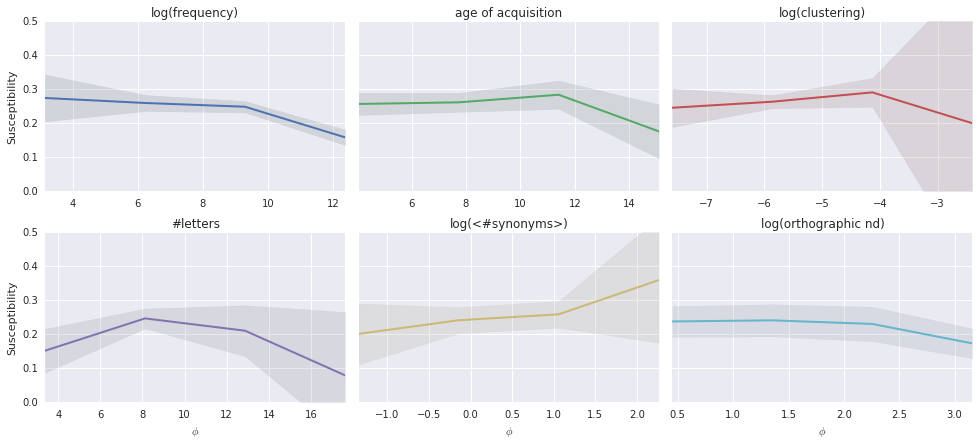

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

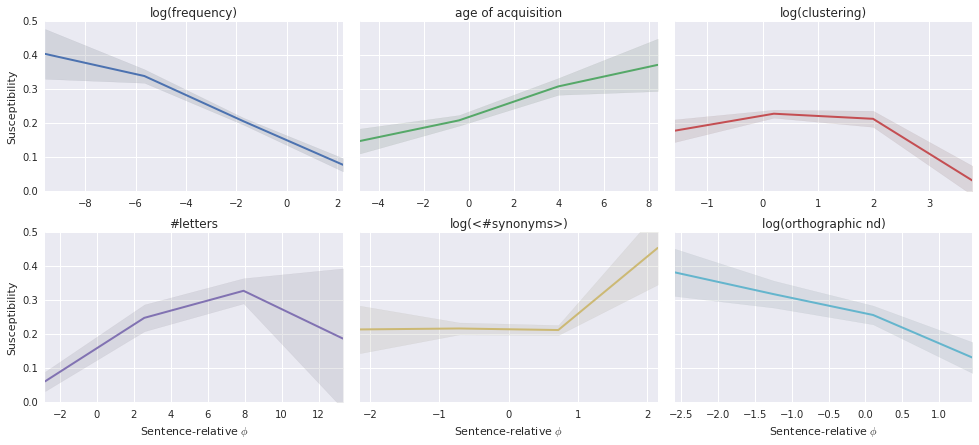

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

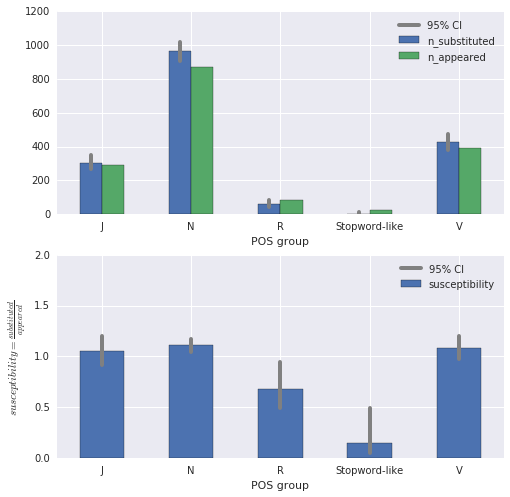

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

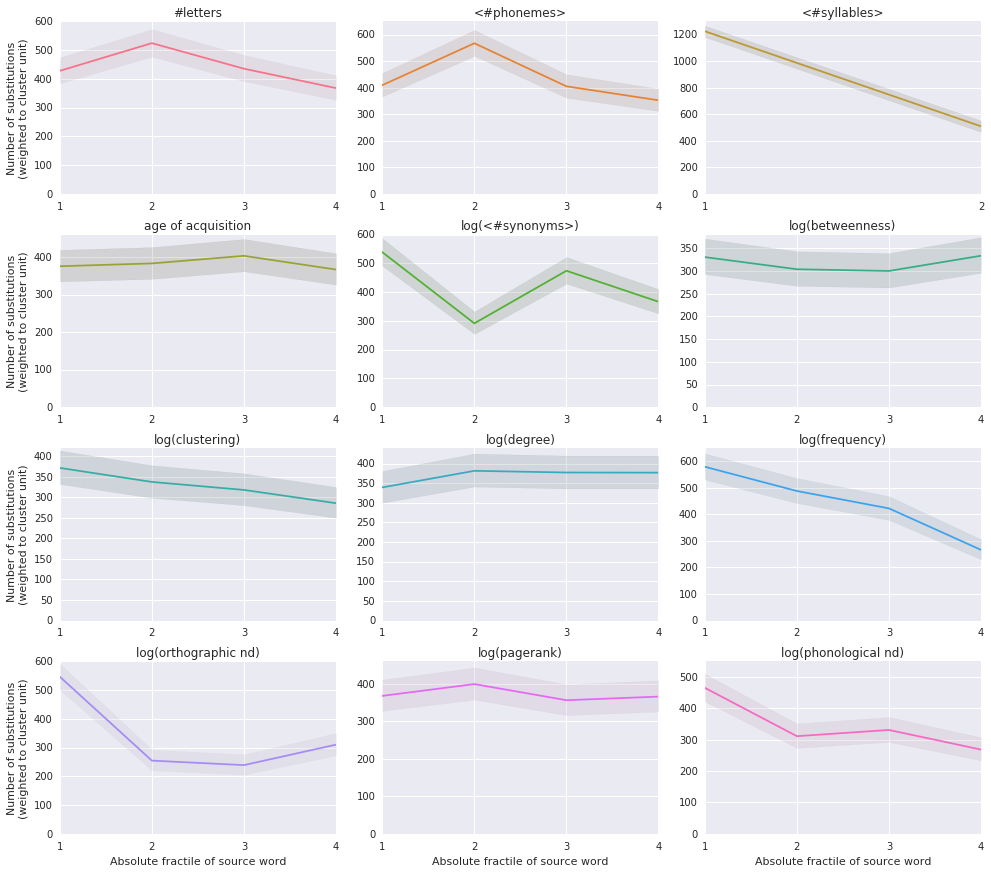

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

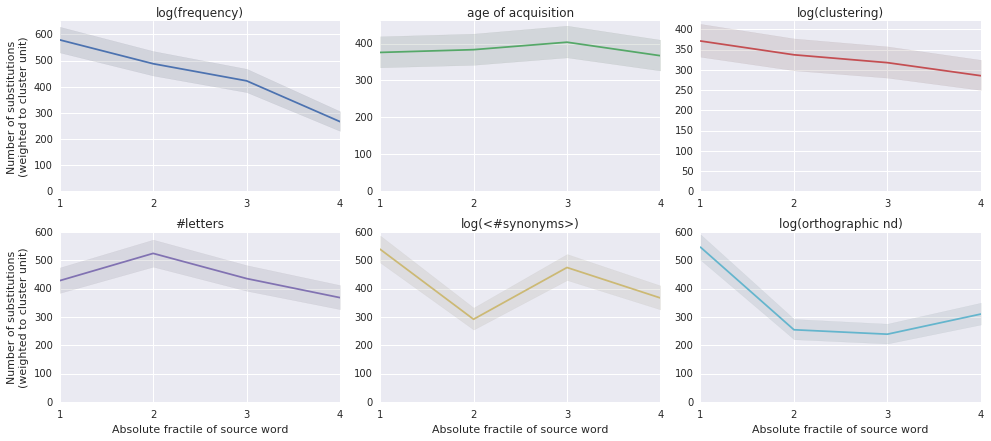

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   79 of 26988) |                    | Elapsed Time: 0:00:01 ETA:  0:05:40

  0% (  150 of 26988) |                    | Elapsed Time: 0:00:02 ETA:  0:06:24

  0% (  218 of 26988) |                    | Elapsed Time: 0:00:03 ETA:  0:06:29

  1% (  300 of 26988) |                    | Elapsed Time: 0:00:04 ETA:  0:06:05

  1% (  338 of 26988) |                    | Elapsed Time: 0:00:04 ETA:  0:05:57

  1% (  417 of 26988) |                    | Elapsed Time: 0:00:05 ETA:  0:05:51

  1% (  504 of 26988) |                    | Elapsed Time: 0:00:06 ETA:  0:05:41

  2% (  600 of 26988) |                    | Elapsed Time: 0:00:07 ETA:  0:05:29

  2% (  675 of 26988) |                    | Elapsed Time: 0:00:08 ETA:  0:05:23

  2% (  750 of 26988) |                    | Elapsed Time: 0:00:09 ETA:  0:05:26

  3% (  836 of 26988) |                    | Elapsed Time: 0:00:10 ETA:  0:05:17

  3% (  905 of 26988) |                    | Elapsed Time: 0:00:11 ETA:  0:05:16

  3% ( 1013 of 26988) |                    | Elapsed Time: 0:00:12 ETA:  0:05:06

  4% ( 1089 of 26988) |                    | Elapsed Time: 0:00:13 ETA:  0:05:06

  4% ( 1171 of 26988) |                    | Elapsed Time: 0:00:14 ETA:  0:05:08

  4% ( 1240 of 26988) |                    | Elapsed Time: 0:00:15 ETA:  0:05:21

  4% ( 1310 of 26988) |                    | Elapsed Time: 0:00:16 ETA:  0:05:30

  5% ( 1350 of 26988) |#                   | Elapsed Time: 0:00:17 ETA:  0:05:28

  5% ( 1425 of 26988) |#                   | Elapsed Time: 0:00:18 ETA:  0:05:33

  5% ( 1499 of 26988) |#                   | Elapsed Time: 0:00:19 ETA:  0:05:29

  5% ( 1572 of 26988) |#                   | Elapsed Time: 0:00:20 ETA:  0:05:46

  6% ( 1642 of 26988) |#                   | Elapsed Time: 0:00:21 ETA:  0:05:47

  6% ( 1687 of 26988) |#                   | Elapsed Time: 0:00:21 ETA:  0:05:48

  6% ( 1763 of 26988) |#                   | Elapsed Time: 0:00:22 ETA:  0:05:50

  6% ( 1838 of 26988) |#                   | Elapsed Time: 0:00:23 ETA:  0:05:45

  7% ( 1915 of 26988) |#                   | Elapsed Time: 0:00:24 ETA:  0:05:39

  7% ( 1992 of 26988) |#                   | Elapsed Time: 0:00:25 ETA:  0:05:37

  7% ( 2025 of 26988) |#                   | Elapsed Time: 0:00:26 ETA:  0:05:36

  7% ( 2104 of 26988) |#                   | Elapsed Time: 0:00:27 ETA:  0:05:32

  8% ( 2180 of 26988) |#                   | Elapsed Time: 0:00:28 ETA:  0:05:29

  8% ( 2259 of 26988) |#                   | Elapsed Time: 0:00:29 ETA:  0:05:24

  8% ( 2335 of 26988) |#                   | Elapsed Time: 0:00:30 ETA:  0:05:22

  8% ( 2362 of 26988) |#                   | Elapsed Time: 0:00:30 ETA:  0:05:24

  9% ( 2446 of 26988) |#                   | Elapsed Time: 0:00:31 ETA:  0:05:19

  9% ( 2535 of 26988) |#                   | Elapsed Time: 0:00:32 ETA:  0:05:11

  9% ( 2619 of 26988) |#                   | Elapsed Time: 0:00:33 ETA:  0:05:06

 10% ( 2699 of 26988) |##                  | Elapsed Time: 0:00:34 ETA:  0:05:03

 10% ( 2781 of 26988) |##                  | Elapsed Time: 0:00:35 ETA:  0:05:01

 10% ( 2851 of 26988) |##                  | Elapsed Time: 0:00:36 ETA:  0:05:02

 10% ( 2923 of 26988) |##                  | Elapsed Time: 0:00:37 ETA:  0:05:05

 11% ( 2992 of 26988) |##                  | Elapsed Time: 0:00:38 ETA:  0:05:08

 11% ( 3037 of 26988) |##                  | Elapsed Time: 0:00:39 ETA:  0:05:08

 11% ( 3108 of 26988) |##                  | Elapsed Time: 0:00:40 ETA:  0:05:13

 11% ( 3189 of 26988) |##                  | Elapsed Time: 0:00:41 ETA:  0:05:16

 12% ( 3264 of 26988) |##                  | Elapsed Time: 0:00:42 ETA:  0:05:21

 12% ( 3342 of 26988) |##                  | Elapsed Time: 0:00:43 ETA:  0:05:23

 12% ( 3374 of 26988) |##                  | Elapsed Time: 0:00:43 ETA:  0:05:27

 12% ( 3451 of 26988) |##                  | Elapsed Time: 0:00:44 ETA:  0:05:21

 13% ( 3515 of 26988) |##                  | Elapsed Time: 0:00:45 ETA:  0:05:25

 13% ( 3596 of 26988) |##                  | Elapsed Time: 0:00:46 ETA:  0:05:16

 13% ( 3660 of 26988) |##                  | Elapsed Time: 0:00:47 ETA:  0:05:19

 13% ( 3711 of 26988) |##                  | Elapsed Time: 0:00:48 ETA:  0:05:22

 13% ( 3778 of 26988) |##                  | Elapsed Time: 0:00:49 ETA:  0:05:30

 14% ( 3855 of 26988) |##                  | Elapsed Time: 0:00:50 ETA:  0:05:27

 14% ( 3936 of 26988) |##                  | Elapsed Time: 0:00:51 ETA:  0:05:24

 14% ( 4030 of 26988) |##                  | Elapsed Time: 0:00:52 ETA:  0:05:11

 15% ( 4049 of 26988) |###                 | Elapsed Time: 0:00:52 ETA:  0:05:11

 15% ( 4139 of 26988) |###                 | Elapsed Time: 0:00:53 ETA:  0:04:55

 15% ( 4227 of 26988) |###                 | Elapsed Time: 0:00:54 ETA:  0:04:50

 15% ( 4294 of 26988) |###                 | Elapsed Time: 0:00:55 ETA:  0:04:47

 16% ( 4386 of 26988) |###                 | Elapsed Time: 0:00:56 ETA:  0:04:27

 16% ( 4485 of 26988) |###                 | Elapsed Time: 0:00:57 ETA:  0:04:15

 16% ( 4572 of 26988) |###                 | Elapsed Time: 0:00:58 ETA:  0:04:11

 17% ( 4667 of 26988) |###                 | Elapsed Time: 0:00:59 ETA:  0:04:10

 17% ( 4723 of 26988) |###                 | Elapsed Time: 0:01:00 ETA:  0:04:08

 17% ( 4831 of 26988) |###                 | Elapsed Time: 0:01:01 ETA:  0:03:59

 18% ( 4904 of 26988) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:05

 18% ( 4976 of 26988) |###                 | Elapsed Time: 0:01:03 ETA:  0:04:02

 18% ( 5061 of 26988) |###                 | Elapsed Time: 0:01:04 ETA:  0:04:05

 19% ( 5151 of 26988) |###                 | Elapsed Time: 0:01:05 ETA:  0:04:08

 19% ( 5228 of 26988) |###                 | Elapsed Time: 0:01:06 ETA:  0:04:12

 19% ( 5301 of 26988) |###                 | Elapsed Time: 0:01:07 ETA:  0:04:22

 19% ( 5381 of 26988) |###                 | Elapsed Time: 0:01:08 ETA:  0:04:25

 20% ( 5398 of 26988) |####                | Elapsed Time: 0:01:08 ETA:  0:04:43

 20% ( 5477 of 26988) |####                | Elapsed Time: 0:01:09 ETA:  0:04:38

 20% ( 5563 of 26988) |####                | Elapsed Time: 0:01:10 ETA:  0:04:29

 20% ( 5654 of 26988) |####                | Elapsed Time: 0:01:11 ETA:  0:04:20

 21% ( 5735 of 26988) |####                | Elapsed Time: 0:01:13 ETA:  0:04:31

 21% ( 5812 of 26988) |####                | Elapsed Time: 0:01:14 ETA:  0:04:30

 21% ( 5894 of 26988) |####                | Elapsed Time: 0:01:15 ETA:  0:04:23

 22% ( 5974 of 26988) |####                | Elapsed Time: 0:01:16 ETA:  0:04:22

 22% ( 6056 of 26988) |####                | Elapsed Time: 0:01:17 ETA:  0:04:18

 22% ( 6073 of 26988) |####                | Elapsed Time: 0:01:17 ETA:  0:04:17

 22% ( 6154 of 26988) |####                | Elapsed Time: 0:01:18 ETA:  0:04:19

 23% ( 6235 of 26988) |####                | Elapsed Time: 0:01:19 ETA:  0:04:24

 23% ( 6317 of 26988) |####                | Elapsed Time: 0:01:20 ETA:  0:04:16

 23% ( 6393 of 26988) |####                | Elapsed Time: 0:01:21 ETA:  0:04:17

 23% ( 6410 of 26988) |####                | Elapsed Time: 0:01:21 ETA:  0:04:16

 24% ( 6482 of 26988) |####                | Elapsed Time: 0:01:22 ETA:  0:04:21

 24% ( 6551 of 26988) |####                | Elapsed Time: 0:01:23 ETA:  0:04:26

 24% ( 6633 of 26988) |####                | Elapsed Time: 0:01:24 ETA:  0:04:25

 25% ( 6748 of 26988) |#####               | Elapsed Time: 0:01:25 ETA:  0:04:06

 25% ( 6812 of 26988) |#####               | Elapsed Time: 0:01:26 ETA:  0:04:16

 25% ( 6885 of 26988) |#####               | Elapsed Time: 0:01:27 ETA:  0:04:20

 25% ( 6958 of 26988) |#####               | Elapsed Time: 0:01:28 ETA:  0:04:21

 26% ( 7035 of 26988) |#####               | Elapsed Time: 0:01:29 ETA:  0:04:19

 26% ( 7085 of 26988) |#####               | Elapsed Time: 0:01:30 ETA:  0:04:13

 26% ( 7148 of 26988) |#####               | Elapsed Time: 0:01:32 ETA:  0:05:00

 26% ( 7242 of 26988) |#####               | Elapsed Time: 0:01:33 ETA:  0:04:51

 27% ( 7321 of 26988) |#####               | Elapsed Time: 0:01:34 ETA:  0:05:13

 27% ( 7399 of 26988) |#####               | Elapsed Time: 0:01:35 ETA:  0:05:05

 27% ( 7422 of 26988) |#####               | Elapsed Time: 0:01:35 ETA:  0:05:00

 27% ( 7495 of 26988) |#####               | Elapsed Time: 0:01:36 ETA:  0:04:59

 28% ( 7575 of 26988) |#####               | Elapsed Time: 0:01:37 ETA:  0:04:54

 28% ( 7657 of 26988) |#####               | Elapsed Time: 0:01:38 ETA:  0:04:49

 28% ( 7738 of 26988) |#####               | Elapsed Time: 0:01:39 ETA:  0:04:47

 28% ( 7760 of 26988) |#####               | Elapsed Time: 0:01:39 ETA:  0:03:54

 29% ( 7849 of 26988) |#####               | Elapsed Time: 0:01:40 ETA:  0:03:56

 29% ( 7928 of 26988) |#####               | Elapsed Time: 0:01:41 ETA:  0:03:55

 29% ( 8012 of 26988) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:50

 30% ( 8097 of 26988) |######              | Elapsed Time: 0:01:43 ETA:  0:03:39

 30% ( 8192 of 26988) |######              | Elapsed Time: 0:01:44 ETA:  0:03:27

 30% ( 8280 of 26988) |######              | Elapsed Time: 0:01:45 ETA:  0:03:23

 30% ( 8365 of 26988) |######              | Elapsed Time: 0:01:46 ETA:  0:03:21

 31% ( 8434 of 26988) |######              | Elapsed Time: 0:01:47 ETA:  0:03:18

 31% ( 8518 of 26988) |######              | Elapsed Time: 0:01:48 ETA:  0:03:20

 31% ( 8607 of 26988) |######              | Elapsed Time: 0:01:49 ETA:  0:03:19

 32% ( 8695 of 26988) |######              | Elapsed Time: 0:01:50 ETA:  0:03:14

 32% ( 8772 of 26988) |######              | Elapsed Time: 0:01:51 ETA:  0:03:23

 32% ( 8860 of 26988) |######              | Elapsed Time: 0:01:52 ETA:  0:03:26

 33% ( 8952 of 26988) |######              | Elapsed Time: 0:01:53 ETA:  0:03:23

 33% ( 9029 of 26988) |######              | Elapsed Time: 0:01:54 ETA:  0:03:26

 33% ( 9109 of 26988) |######              | Elapsed Time: 0:01:55 ETA:  0:03:22

 34% ( 9205 of 26988) |######              | Elapsed Time: 0:01:56 ETA:  0:03:15

 34% ( 9306 of 26988) |######              | Elapsed Time: 0:01:57 ETA:  0:03:09

 34% ( 9407 of 26988) |######              | Elapsed Time: 0:01:58 ETA:  0:03:02

 35% ( 9446 of 26988) |#######             | Elapsed Time: 0:01:58 ETA:  0:02:53

 35% ( 9544 of 26988) |#######             | Elapsed Time: 0:01:59 ETA:  0:02:50

 35% ( 9636 of 26988) |#######             | Elapsed Time: 0:02:00 ETA:  0:02:47

 36% ( 9730 of 26988) |#######             | Elapsed Time: 0:02:01 ETA:  0:02:45

 36% ( 9784 of 26988) |#######             | Elapsed Time: 0:02:02 ETA:  0:02:41

 36% ( 9859 of 26988) |#######             | Elapsed Time: 0:02:03 ETA:  0:02:46

 36% ( 9950 of 26988) |#######             | Elapsed Time: 0:02:04 ETA:  0:02:47

 37% (10039 of 26988) |#######             | Elapsed Time: 0:02:05 ETA:  0:02:51

 37% (10121 of 26988) |#######             | Elapsed Time: 0:02:06 ETA:  0:03:03

 37% (10198 of 26988) |#######             | Elapsed Time: 0:02:07 ETA:  0:03:12

 38% (10280 of 26988) |#######             | Elapsed Time: 0:02:08 ETA:  0:03:15

 38% (10363 of 26988) |#######             | Elapsed Time: 0:02:09 ETA:  0:03:20

 38% (10441 of 26988) |#######             | Elapsed Time: 0:02:10 ETA:  0:03:22

 38% (10458 of 26988) |#######             | Elapsed Time: 0:02:10 ETA:  0:03:19

 39% (10547 of 26988) |#######             | Elapsed Time: 0:02:11 ETA:  0:03:19

 39% (10653 of 26988) |#######             | Elapsed Time: 0:02:12 ETA:  0:03:09

 39% (10740 of 26988) |#######             | Elapsed Time: 0:02:13 ETA:  0:03:03

 40% (10796 of 26988) |########            | Elapsed Time: 0:02:14 ETA:  0:03:04

 40% (10885 of 26988) |########            | Elapsed Time: 0:02:15 ETA:  0:02:58

 40% (10960 of 26988) |########            | Elapsed Time: 0:02:16 ETA:  0:03:01

 40% (11050 of 26988) |########            | Elapsed Time: 0:02:17 ETA:  0:02:57

 41% (11133 of 26988) |########            | Elapsed Time: 0:02:18 ETA:  0:02:56

 41% (11209 of 26988) |########            | Elapsed Time: 0:02:19 ETA:  0:03:01

 41% (11290 of 26988) |########            | Elapsed Time: 0:02:20 ETA:  0:03:12

 42% (11390 of 26988) |########            | Elapsed Time: 0:02:21 ETA:  0:03:04

 42% (11470 of 26988) |########            | Elapsed Time: 0:02:22 ETA:  0:03:00

 42% (11566 of 26988) |########            | Elapsed Time: 0:02:23 ETA:  0:02:55

 43% (11651 of 26988) |########            | Elapsed Time: 0:02:24 ETA:  0:02:50

 43% (11744 of 26988) |########            | Elapsed Time: 0:02:25 ETA:  0:02:48

 43% (11808 of 26988) |########            | Elapsed Time: 0:02:26 ETA:  0:02:41

 44% (11899 of 26988) |########            | Elapsed Time: 0:02:27 ETA:  0:02:38

 44% (11987 of 26988) |########            | Elapsed Time: 0:02:28 ETA:  0:02:32

 44% (12065 of 26988) |########            | Elapsed Time: 0:02:29 ETA:  0:02:33

 45% (12145 of 26988) |#########           | Elapsed Time: 0:02:30 ETA:  0:02:45

 45% (12222 of 26988) |#########           | Elapsed Time: 0:02:31 ETA:  0:02:53

 45% (12297 of 26988) |#########           | Elapsed Time: 0:02:32 ETA:  0:02:57

 45% (12370 of 26988) |#########           | Elapsed Time: 0:02:33 ETA:  0:03:06

 46% (12453 of 26988) |#########           | Elapsed Time: 0:02:34 ETA:  0:03:08

 46% (12482 of 26988) |#########           | Elapsed Time: 0:02:34 ETA:  0:03:12

 46% (12560 of 26988) |#########           | Elapsed Time: 0:02:35 ETA:  0:03:17

 46% (12640 of 26988) |#########           | Elapsed Time: 0:02:36 ETA:  0:03:15

 47% (12723 of 26988) |#########           | Elapsed Time: 0:02:37 ETA:  0:03:05

 47% (12790 of 26988) |#########           | Elapsed Time: 0:02:38 ETA:  0:03:11

 47% (12820 of 26988) |#########           | Elapsed Time: 0:02:39 ETA:  0:03:09

 47% (12884 of 26988) |#########           | Elapsed Time: 0:02:40 ETA:  0:03:15

 48% (12960 of 26988) |#########           | Elapsed Time: 0:02:41 ETA:  0:03:12

 48% (13040 of 26988) |#########           | Elapsed Time: 0:02:42 ETA:  0:03:13

 48% (13119 of 26988) |#########           | Elapsed Time: 0:02:43 ETA:  0:03:13

 48% (13157 of 26988) |#########           | Elapsed Time: 0:02:43 ETA:  0:03:18

 49% (13234 of 26988) |#########           | Elapsed Time: 0:02:44 ETA:  0:03:18

 49% (13315 of 26988) |#########           | Elapsed Time: 0:02:45 ETA:  0:03:18

 49% (13402 of 26988) |#########           | Elapsed Time: 0:02:46 ETA:  0:03:06

 50% (13495 of 26988) |##########          | Elapsed Time: 0:02:48 ETA:  0:02:57

 50% (13566 of 26988) |##########          | Elapsed Time: 0:02:49 ETA:  0:02:58

 50% (13653 of 26988) |##########          | Elapsed Time: 0:02:50 ETA:  0:02:54

 50% (13754 of 26988) |##########          | Elapsed Time: 0:02:51 ETA:  0:02:40

 51% (13832 of 26988) |##########          | Elapsed Time: 0:02:52 ETA:  0:02:31

 51% (13913 of 26988) |##########          | Elapsed Time: 0:02:53 ETA:  0:02:28

 51% (13987 of 26988) |##########          | Elapsed Time: 0:02:54 ETA:  0:02:31

 52% (14071 of 26988) |##########          | Elapsed Time: 0:02:55 ETA:  0:02:32

 52% (14169 of 26988) |##########          | Elapsed Time: 0:02:56 ETA:  0:02:25

 52% (14246 of 26988) |##########          | Elapsed Time: 0:02:57 ETA:  0:02:21

 53% (14331 of 26988) |##########          | Elapsed Time: 0:02:58 ETA:  0:02:20

 53% (14431 of 26988) |##########          | Elapsed Time: 0:02:59 ETA:  0:02:20

 53% (14507 of 26988) |##########          | Elapsed Time: 0:02:59 ETA:  0:02:18

 54% (14610 of 26988) |##########          | Elapsed Time: 0:03:00 ETA:  0:02:07

 54% (14700 of 26988) |##########          | Elapsed Time: 0:03:01 ETA:  0:01:59

 54% (14792 of 26988) |##########          | Elapsed Time: 0:03:03 ETA:  0:01:54

 55% (14844 of 26988) |###########         | Elapsed Time: 0:03:03 ETA:  0:01:54

 55% (14931 of 26988) |###########         | Elapsed Time: 0:03:04 ETA:  0:01:55

 55% (15018 of 26988) |###########         | Elapsed Time: 0:03:05 ETA:  0:01:50

 55% (15091 of 26988) |###########         | Elapsed Time: 0:03:06 ETA:  0:01:54

 56% (15181 of 26988) |###########         | Elapsed Time: 0:03:07 ETA:  0:02:01

 56% (15272 of 26988) |###########         | Elapsed Time: 0:03:08 ETA:  0:02:05

 56% (15366 of 26988) |###########         | Elapsed Time: 0:03:09 ETA:  0:02:02

 57% (15435 of 26988) |###########         | Elapsed Time: 0:03:10 ETA:  0:02:12

 57% (15519 of 26988) |###########         | Elapsed Time: 0:03:11 ETA:  0:02:11

 57% (15617 of 26988) |###########         | Elapsed Time: 0:03:12 ETA:  0:02:05

 58% (15713 of 26988) |###########         | Elapsed Time: 0:03:13 ETA:  0:02:00

 58% (15796 of 26988) |###########         | Elapsed Time: 0:03:14 ETA:  0:01:55

 58% (15856 of 26988) |###########         | Elapsed Time: 0:03:15 ETA:  0:01:53

 59% (15938 of 26988) |###########         | Elapsed Time: 0:03:16 ETA:  0:01:55

 59% (16009 of 26988) |###########         | Elapsed Time: 0:03:17 ETA:  0:02:03

 59% (16088 of 26988) |###########         | Elapsed Time: 0:03:18 ETA:  0:02:09

 59% (16157 of 26988) |###########         | Elapsed Time: 0:03:19 ETA:  0:02:08

 60% (16193 of 26988) |############        | Elapsed Time: 0:03:20 ETA:  0:02:12

 60% (16265 of 26988) |############        | Elapsed Time: 0:03:21 ETA:  0:02:24

 60% (16349 of 26988) |############        | Elapsed Time: 0:03:22 ETA:  0:02:30

 60% (16428 of 26988) |############        | Elapsed Time: 0:03:23 ETA:  0:02:31

 61% (16531 of 26988) |############        | Elapsed Time: 0:03:24 ETA:  0:02:27

 61% (16603 of 26988) |############        | Elapsed Time: 0:03:25 ETA:  0:02:26

 61% (16684 of 26988) |############        | Elapsed Time: 0:03:26 ETA:  0:02:24

 62% (16765 of 26988) |############        | Elapsed Time: 0:03:27 ETA:  0:02:16

 62% (16868 of 26988) |############        | Elapsed Time: 0:03:28 ETA:  0:01:59

 62% (16948 of 26988) |############        | Elapsed Time: 0:03:29 ETA:  0:02:00

 63% (17024 of 26988) |############        | Elapsed Time: 0:03:30 ETA:  0:02:01

 63% (17133 of 26988) |############        | Elapsed Time: 0:03:31 ETA:  0:01:50

 63% (17205 of 26988) |############        | Elapsed Time: 0:03:32 ETA:  0:01:51

 64% (17294 of 26988) |############        | Elapsed Time: 0:03:33 ETA:  0:01:42

 64% (17392 of 26988) |############        | Elapsed Time: 0:03:34 ETA:  0:01:34

 64% (17416 of 26988) |############        | Elapsed Time: 0:03:36 ETA:  0:02:39

 64% (17503 of 26988) |############        | Elapsed Time: 0:03:37 ETA:  0:02:43

 65% (17543 of 26988) |#############       | Elapsed Time: 0:03:37 ETA:  0:02:41

 65% (17630 of 26988) |#############       | Elapsed Time: 0:03:38 ETA:  0:02:36

 65% (17714 of 26988) |#############       | Elapsed Time: 0:03:39 ETA:  0:02:31

 65% (17810 of 26988) |#############       | Elapsed Time: 0:03:40 ETA:  0:02:37

 66% (17880 of 26988) |#############       | Elapsed Time: 0:03:41 ETA:  0:02:35

 66% (17961 of 26988) |#############       | Elapsed Time: 0:03:42 ETA:  0:02:39

 66% (18048 of 26988) |#############       | Elapsed Time: 0:03:43 ETA:  0:02:44

 67% (18133 of 26988) |#############       | Elapsed Time: 0:03:44 ETA:  0:01:33

 67% (18217 of 26988) |#############       | Elapsed Time: 0:03:45 ETA:  0:01:32

 67% (18300 of 26988) |#############       | Elapsed Time: 0:03:46 ETA:  0:01:30

 68% (18374 of 26988) |#############       | Elapsed Time: 0:03:47 ETA:  0:01:34

 68% (18450 of 26988) |#############       | Elapsed Time: 0:03:48 ETA:  0:01:37

 68% (18523 of 26988) |#############       | Elapsed Time: 0:03:49 ETA:  0:01:46

 68% (18555 of 26988) |#############       | Elapsed Time: 0:03:50 ETA:  0:01:48

 69% (18631 of 26988) |#############       | Elapsed Time: 0:03:51 ETA:  0:01:49

 69% (18708 of 26988) |#############       | Elapsed Time: 0:03:52 ETA:  0:01:54

 69% (18782 of 26988) |#############       | Elapsed Time: 0:03:53 ETA:  0:01:59

 70% (18892 of 26988) |##############      | Elapsed Time: 0:03:54 ETA:  0:01:54

 70% (18975 of 26988) |##############      | Elapsed Time: 0:03:55 ETA:  0:01:48

 70% (19055 of 26988) |##############      | Elapsed Time: 0:03:56 ETA:  0:01:44

 70% (19147 of 26988) |##############      | Elapsed Time: 0:03:57 ETA:  0:01:33

 71% (19229 of 26988) |##############      | Elapsed Time: 0:03:58 ETA:  0:01:28

 71% (19310 of 26988) |##############      | Elapsed Time: 0:03:59 ETA:  0:01:25

 71% (19413 of 26988) |##############      | Elapsed Time: 0:04:00 ETA:  0:01:09

 72% (19492 of 26988) |##############      | Elapsed Time: 0:04:01 ETA:  0:01:15

 72% (19567 of 26988) |##############      | Elapsed Time: 0:04:02 ETA:  0:01:18

 72% (19654 of 26988) |##############      | Elapsed Time: 0:04:03 ETA:  0:01:15

 73% (19731 of 26988) |##############      | Elapsed Time: 0:04:04 ETA:  0:01:16

 73% (19801 of 26988) |##############      | Elapsed Time: 0:04:05 ETA:  0:01:25

 73% (19904 of 26988) |##############      | Elapsed Time: 0:04:06 ETA:  0:01:18

 74% (20022 of 26988) |##############      | Elapsed Time: 0:04:07 ETA:  0:01:00

 74% (20109 of 26988) |##############      | Elapsed Time: 0:04:08 ETA:  0:01:06

 74% (20193 of 26988) |##############      | Elapsed Time: 0:04:09 ETA:  0:01:03

 75% (20242 of 26988) |###############     | Elapsed Time: 0:04:10 ETA:  0:01:04

 75% (20331 of 26988) |###############     | Elapsed Time: 0:04:11 ETA:  0:01:01

 75% (20431 of 26988) |###############     | Elapsed Time: 0:04:12 ETA:  0:00:50

 76% (20514 of 26988) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:43

 76% (20579 of 26988) |###############     | Elapsed Time: 0:04:14 ETA:  0:00:47

 76% (20659 of 26988) |###############     | Elapsed Time: 0:04:15 ETA:  0:00:50

 76% (20744 of 26988) |###############     | Elapsed Time: 0:04:16 ETA:  0:01:03

 77% (20830 of 26988) |###############     | Elapsed Time: 0:04:17 ETA:  0:01:02

 77% (20916 of 26988) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:58

 77% (21001 of 26988) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:55

 78% (21088 of 26988) |###############     | Elapsed Time: 0:04:20 ETA:  0:00:55

 78% (21179 of 26988) |###############     | Elapsed Time: 0:04:21 ETA:  0:00:58

 78% (21254 of 26988) |###############     | Elapsed Time: 0:04:22 ETA:  0:00:58

 79% (21331 of 26988) |###############     | Elapsed Time: 0:04:23 ETA:  0:00:57

 79% (21403 of 26988) |###############     | Elapsed Time: 0:04:24 ETA:  0:00:59

 79% (21482 of 26988) |###############     | Elapsed Time: 0:04:25 ETA:  0:01:01

 79% (21557 of 26988) |###############     | Elapsed Time: 0:04:26 ETA:  0:01:05

 80% (21591 of 26988) |################    | Elapsed Time: 0:04:26 ETA:  0:01:07

 80% (21674 of 26988) |################    | Elapsed Time: 0:04:27 ETA:  0:01:07

 80% (21754 of 26988) |################    | Elapsed Time: 0:04:28 ETA:  0:01:09

 80% (21833 of 26988) |################    | Elapsed Time: 0:04:29 ETA:  0:01:14

 81% (21928 of 26988) |################    | Elapsed Time: 0:04:30 ETA:  0:01:05

 81% (22021 of 26988) |################    | Elapsed Time: 0:04:31 ETA:  0:00:53

 81% (22105 of 26988) |################    | Elapsed Time: 0:04:32 ETA:  0:00:49

 82% (22189 of 26988) |################    | Elapsed Time: 0:04:33 ETA:  0:00:43

 82% (22266 of 26988) |################    | Elapsed Time: 0:04:34 ETA:  0:00:47

 82% (22340 of 26988) |################    | Elapsed Time: 0:04:35 ETA:  0:00:50

 83% (22427 of 26988) |################    | Elapsed Time: 0:04:36 ETA:  0:00:46

 83% (22511 of 26988) |################    | Elapsed Time: 0:04:37 ETA:  0:00:43

 83% (22603 of 26988) |################    | Elapsed Time: 0:04:38 ETA:  0:00:40

 84% (22685 of 26988) |################    | Elapsed Time: 0:04:39 ETA:  0:00:41

 84% (22763 of 26988) |################    | Elapsed Time: 0:04:40 ETA:  0:00:46

 84% (22856 of 26988) |################    | Elapsed Time: 0:04:41 ETA:  0:00:41

 85% (22940 of 26988) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:39

 85% (23016 of 26988) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:40

 85% (23093 of 26988) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:38

 85% (23172 of 26988) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:41

 86% (23278 of 26988) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:37

 86% (23361 of 26988) |#################   | Elapsed Time: 0:04:47 ETA:  0:00:36

 86% (23439 of 26988) |#################   | Elapsed Time: 0:04:48 ETA:  0:00:35

 87% (23537 of 26988) |#################   | Elapsed Time: 0:04:49 ETA:  0:00:32

 87% (23615 of 26988) |#################   | Elapsed Time: 0:04:50 ETA:  0:00:30

 87% (23708 of 26988) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:21

 88% (23784 of 26988) |#################   | Elapsed Time: 0:04:52 ETA:  0:00:20

 88% (23860 of 26988) |#################   | Elapsed Time: 0:04:53 ETA:  0:00:20

 88% (23952 of 26988) |#################   | Elapsed Time: 0:04:54 ETA:  0:00:26

 89% (24036 of 26988) |#################   | Elapsed Time: 0:04:55 ETA:  0:00:24

 89% (24114 of 26988) |#################   | Elapsed Time: 0:04:56 ETA:  0:00:23

 89% (24204 of 26988) |#################   | Elapsed Time: 0:04:57 ETA:  0:00:26

 90% (24290 of 26988) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:33

 90% (24368 of 26988) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:30

 90% (24443 of 26988) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:30

 90% (24537 of 26988) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:23

 91% (24627 of 26988) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:14

 91% (24711 of 26988) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:13

 91% (24805 of 26988) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:05

 92% (24896 of 26988) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:04

 92% (24964 of 26988) |##################  | Elapsed Time: 0:05:06 ETA:  0:00:03

 92% (25044 of 26988) |##################  | Elapsed Time: 0:05:07 ETA:  0:00:05

 93% (25128 of 26988) |##################  | Elapsed Time: 0:05:08 ETA:  0:00:02

 93% (25212 of 26988) |##################  | Elapsed Time: 0:05:09 ETA:  0:00:00

 93% (25302 of 26988) |##################  | Elapsed Time: 0:05:10 ETA:  0:00:09

 94% (25394 of 26988) |##################  | Elapsed Time: 0:05:11 ETA:  0:00:04

 94% (25488 of 26988) |##################  | Elapsed Time: 0:05:12 ETA:  0:00:03

 94% (25576 of 26988) |##################  | Elapsed Time: 0:05:13 ETA:  0:00:04

 95% (25639 of 26988) |################### | Elapsed Time: 0:05:14 ETA:  0:00:11

 95% (25719 of 26988) |################### | Elapsed Time: 0:05:15 ETA:  0:00:10

 95% (25806 of 26988) |################### | Elapsed Time: 0:05:16 ETA:  0:00:08

 95% (25887 of 26988) |################### | Elapsed Time: 0:05:17 ETA:  0:00:08

 96% (25976 of 26988) |################### | Elapsed Time: 0:05:18 ETA:  0:00:03

 96% (26068 of 26988) |################### | Elapsed Time: 0:05:19 ETA:  0:00:02

 96% (26159 of 26988) |################### | Elapsed Time: 0:05:20 ETA:  0:00:03

 97% (26236 of 26988) |################### | Elapsed Time: 0:05:21 ETA:  0:00:07

 97% (26314 of 26988) |################### | Elapsed Time: 0:05:22 ETA:  0:00:00

 97% (26411 of 26988) |################### | Elapsed Time: 0:05:23 ETA:  0:00:00

 98% (26491 of 26988) |################### | Elapsed Time: 0:05:24 ETA:  0:00:00

 98% (26580 of 26988) |################### | Elapsed Time: 0:05:25 ETA:  0:00:00

 98% (26651 of 26988) |################### | Elapsed Time: 0:05:26 ETA:  0:00:00

 99% (26740 of 26988) |################### | Elapsed Time: 0:05:27 ETA:  0:00:00

 99% (26833 of 26988) |################### | Elapsed Time: 0:05:28 ETA:  0:00:00

 99% (26921 of 26988) |################### | Elapsed Time: 0:05:29 ETA:  0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:05:30 Time: 0:05:30


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

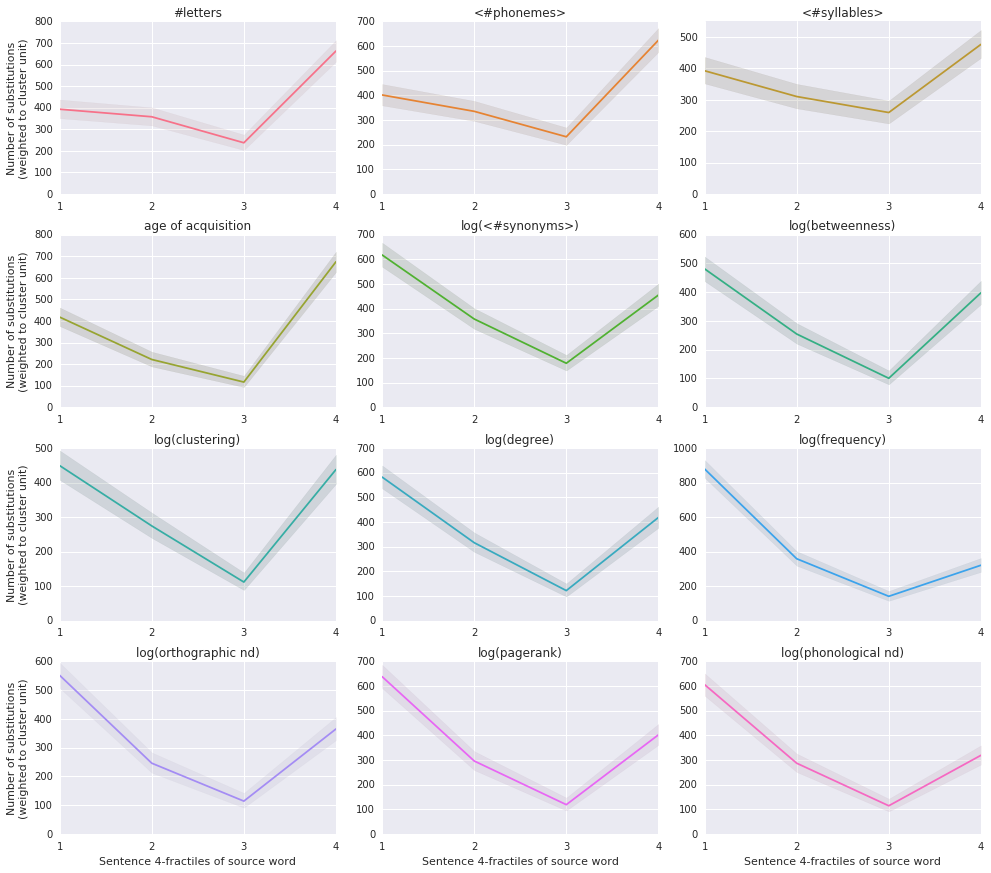

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

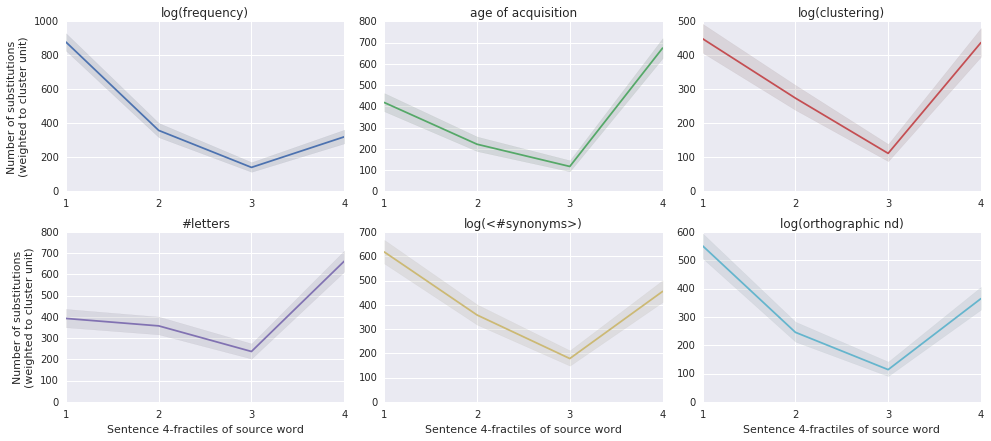

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)